In [ ]:
# run before presenting to create population
import pandas as pd
import numpy as np
virtual_ugrads = pd.DataFrame({'student_id': range(1,50001),'phone_type' : np.random.binomial(1,.63,50000) })

virtual_ugrads["phone_type"]= virtual_ugrads["phone_type"].apply(lambda x:"iphone" if x>0.5 else "other") 
virtual_ugrads

## DSCI 100 - Introduction to Data Science

### Lecture 11 - Introduction to inference & sampling

<img src="https://tinystats.github.io/teacups-giraffes-and-statistics/images/02_bellCurve/giraffe_lineup4.jpg" width=600>

Source: [Desirée De Lyon's Tea cup Giraffe's statistics course](https://tinystats.github.io/teacups-giraffes-and-statistics/02_bellCurve.html)

## Reminders

- Final exam 
- Project report & team work report due dates on canvas

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-1.png" width=1100>


## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-2.png" width=1100>

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-3.png" width=1100>

## What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-4.png" width=1100>

- **Population:** collection of all possible observations + their frequency/count
    - e.g. the widths of the entire population of sea stars

- **Sample:** a randomly selected subset of observations
    - e.g. I randomly pick 50 sea stars and record their widths

- **Sample estimate:** something I compute using my sample
    - e.g. the mean width of the sea stars *in my sample*
    (still called "statistic" in the slide)

- **Inference:** using the sample to make a conclusion about the whole population, and *knowing how uncertain you are* about your conclusion

## Inference in the wild: opinion polling

Based on the results of a recent Reuters poll, we estimate that 47.2% of Americans think that firearms should have strong regulations or restrictions when thinking about gun ownership rights and gun laws.

source: http://polling.reuters.com/#!response/PV20/type/smallest/dates/20180505-20181002/collapsed/true

## Inference in the wild: market assessment

What proportion of undergraduate students have an iphone?

<img img align="left" src="https://media.wired.com/photos/5b22c5c4b878a15e9ce80d92/master/w_582,c_limit/iphonex-TA.jpg" width="500"/>

## Inference in the wild: A/B testing

*(not in DSCI100 - you'll need to take a more advanced DSCI or STAT class for this!)*

Which of the 2 website designs will lead to more customer engagement (measured by click-through-rate, for example)?

<img img align="left" src="https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png" width="600"/>

source: https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png

## Estimation

A particular inferential problem where we try to *estimate a quantitative property* of the population

This quantitative property is called a **population parameter**

**Question:** What *proportion* (a quantitative population parameter!) of UBC  undergrads have an iphone?
<img align="left" src="img/sampling.001.jpeg" width="700"/>

## Estimation

Step 1: randomly select a subset (a *sample*) and ask them if they have an iPhone

Step 2: calculate the proportion in our sample (a *sample estimate*) and use it as an estimate of the true population proportion.

<img align="left" src="img/sampling.002.jpeg" width="700"/>

# Virtual simulation experiment

Let's simulate this process to see how well sample estimates reflect the true population parameter!

**Question:** What proportion of UBC undergrads have an iPhone?

- Let's create a virtual group of students (our population) where 63% of the students have iPhones
- Then:
    - collect a random sample of 40 students, 
    - calculate a proportion of students with iPhones
   
<img img align="left" src="https://www.ubc.ca/_assets/img/okanagan-undergraduates-1920x700.jpg" width = 800/>

### As always, load the libraries we'll be using:

In [ ]:
# load libraries for wrangling and plotting
import pandas as pd
import numpy as np
import altair as alt


### 1. Our virtual UBC students (population)

Let's examine our population of 50,000 students. Remember that the true proportion of iPhone users is 63%.

In [ ]:
virtual_ugrads

Of course, we usually do not have access to the true population, but here let’s imagine (for learning purposes) that our data set represents the population of iPhone users.

Check that the virtual population contains ~ 63% iPhone users:

In [ ]:
virtual_ugrads.value_counts('phone_type', normalize=True)

### 2. Drawing a single sample of size 40

Let's simulate taking one random sample from our virtual undergrad population. We will use the `rep_sample_n` function from the `infer` package:

In [ ]:
# draw a single sample from the virtual population
virtual_ugrads.sample(n=100)

We can tell by the `student_id` column that Python indeed did what we asked - randomly selected 40 students from our virtual population.

What happens if we take another sample? -> Execute cell again

### What is the proportion of iPhone users in our sample?

Is it close to the population proportion?

In [ ]:
# compute the proportion of iPhone users
virtual_ugrads.sample(n=100).value_counts('phone_type', normalize=True)

We know that the exact observations will not be the same between the sample,
but what about the proportion of iphone users,
will that change too?

Indeed, estimates vary from sample to sample due to sampling variability. But just how much should we expect the estimates of our random samples to vary? Or in other words, how much can we really trust our point estimate based on a single sample?

## Sampling distribution

The *distribution* of estimates you get by taking many samples *of a fixed sample size* is called the **sampling distribution**.

Let's first creat many samples and concatenate them into one big dataframe.

In [ ]:
# take many samples from virtual student population
samples = pd.concat([
    virtual_ugrads.sample(100).assign(replicate=n)
    for n in range(4_000)
])
samples

```
[n for n in range(3)]
```

To understand this, we will simulate many samples (much more than just two) of size 40 from our population

## Sampling distribution

Next, let's compute the proportion of phones for of each replicate/sample.

In [ ]:
sample_estimates = (
    samples
    .groupby("replicate")
    ["phone_type"]
    .value_counts(normalize=True)
    .reset_index(name="sample_proportion")
)

sample_estimates = sample_estimates[sample_estimates['phone_type'] == 'iphone']
sample_estimates

In [ ]:
sample_estimates = (
    samples
    .groupby('replicate')
    ['phone_type']
    .value_counts(normalize=True)
    .reset_index(name='sample_proportion')
)

sample_estimates = sample_estimates[sample_estimates['phone_type'] == 'iphone']
sample_estimates

Then we calculate the proportion of entire home/apartment listings in each sample.

This simulation will create many sample proportions, which we can visualize using a histogram. The distribution of the estimate for all possible samples of a given size from a population is called a sampling distribution.

The sampling distribution will help us see how much we would expect our sample proportions from this population to vary for samples of size 40.

## Sampling distribution

Visualizing the **sampling distribution** as a histogram.

In [ ]:
alt.Chart(sample_estimates).mark_bar().encode(
    x=alt.X("sample_proportion")
        .bin(maxbins=30)
        .title("Proportion of iPhone Users"),
    y=alt.Y("count()").title("Count"),
)

In [ ]:
sample_estimates["sample_proportion"].mean()

In [ ]:
virtual_ugrads.value_counts('phone_type', normalize=True)

Keep in mind: in the real world, we don’t have access to the full population. So we can’t take many samples and can’t actually construct or visualize the sampling distribution. We have created this particular example such that we do have access to the full population, which lets us visualize the sampling distribution directly for learning purposes.

How did we do? How reliable is our sample estimate? Should we do anything to change it?

## Sampling distribution

Visualizing the **sampling distribution** of a quantitative column instead of a proportion.

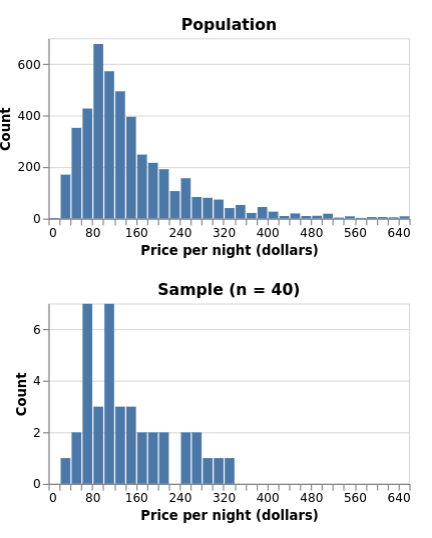

## Sampling distribution

Visualizing the **sampling distribution** of a quantitative column instead of a proportion.


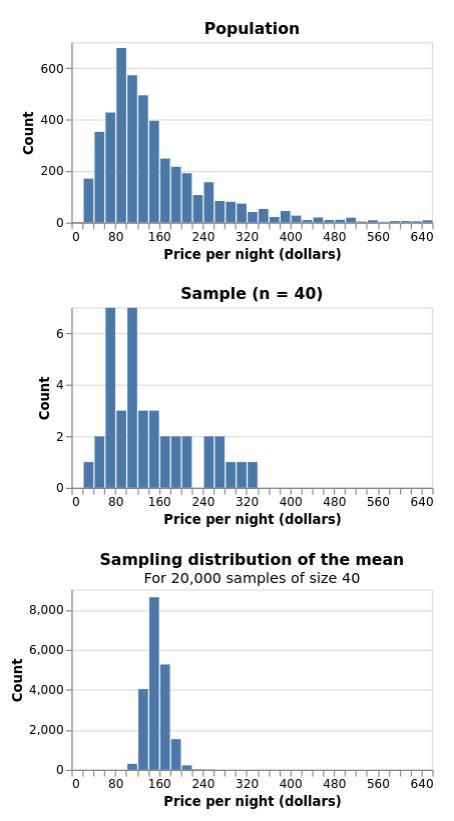

## Worksheet time - go for it!

<img align="left" src="https://media.giphy.com/media/CjmvTCZf2U3p09Cn0h/giphy.gif" width="500"/>

### Go to Canvas, and fill out the survey `iphone_poll` in week 11!

### True or False:
1. A larger sample will give a more accurate sample statistic.
2. If our population is only size 20, we should just measure all the observations instead of sampling.
3. In order to understand how reliable our sample estimate is, we can take many *replicates* and see how the estimate varies.
4. UBC has implanted a secret microchip in all of your brains to know whether or not you have an iPhone, and so doesn't need to sample.

### Let's vote! Which of these are these proportion values? 
- parameters
- statistics 
- samples
- populations

# Acknowledgements
- [Data Science in a box](https://github.com/rstudio-education/datascience-box) by Mine Cetinkaya-Rundel
- [Inference in 3 hours](https://github.com/AllenDowney/CompStats) by Allan Downey
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim